<a href="https://colab.research.google.com/github/RiddhiKakkar/Facebook-Prophet/blob/main/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET

TASK#1 : PROJECT OVERVIEW

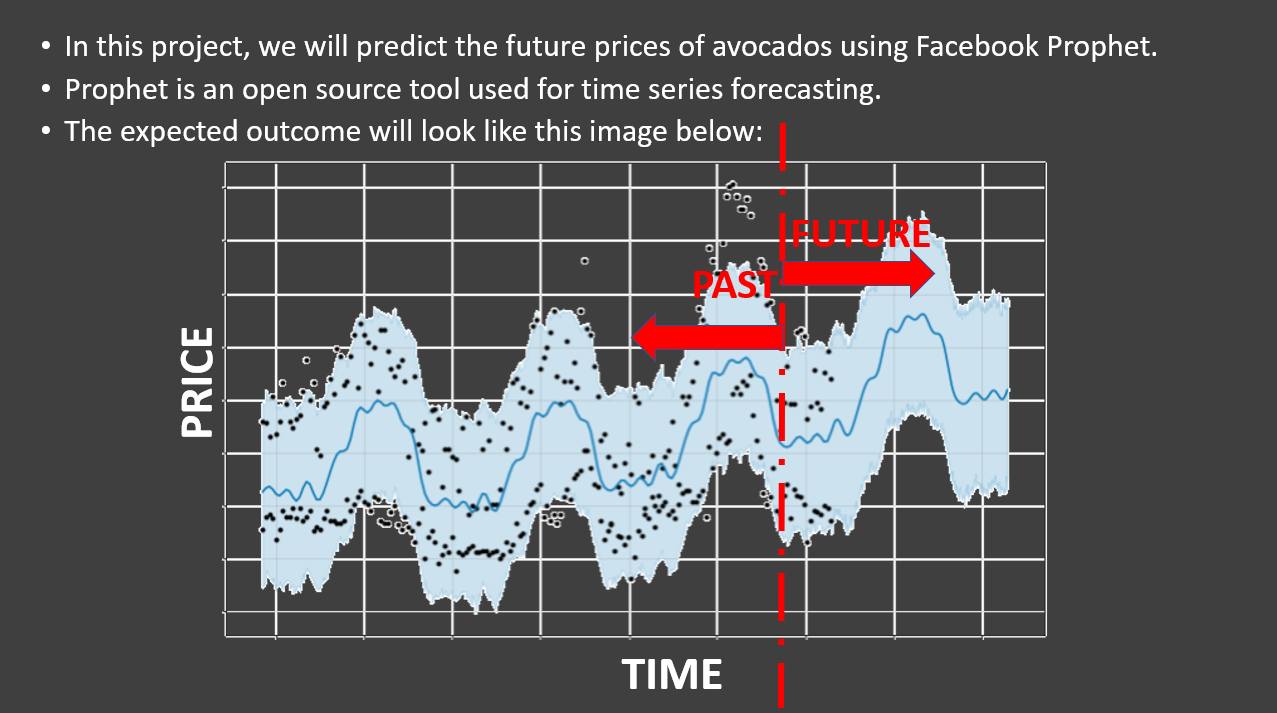

TASK #2 : IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd #import pandas for data manipulation using dataframes
import numpy as np #import numpy for data statistical analysis
import matplotlib.pyplot as plt #import matplotlib for data visualization
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
#dataframes creation for both training and testing datasets
avocado_df = pd.read_csv('/content/avocado.csv')

1. Date : The date of the observation
2. AveragePrice : the average price of a single avocado
3. type : conventional or organic
4. year : the year
5. Region : the city or region of the observation
6. Total volume : Total number of avocados sold
7. 4046 : total number of avocados with PLU 4046 sold
8. 4225 : total number of avocados with PLU 4225 sold
9. 4770 : total number of avocados with PLU 4770 sold

In [3]:
# head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# tail of the training dataset
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
avocado_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

TASK #3 : EXPLORE DATASET

In [8]:
avocado_df = avocado_df.sort_values('Date')

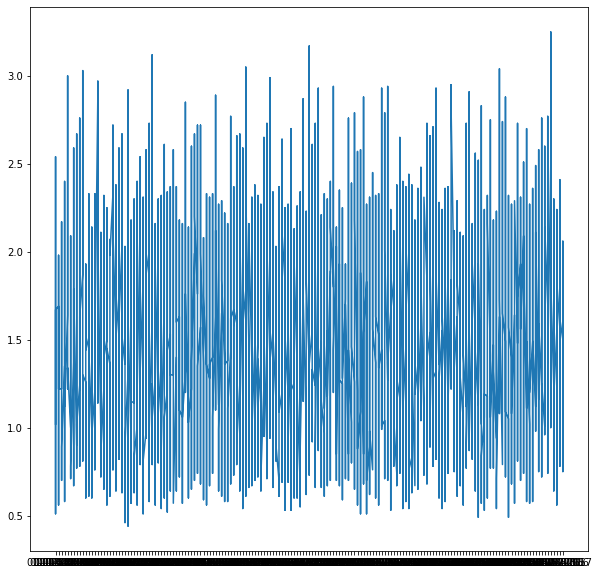

In [9]:
# Plot date and average price
plt.figure(figsize = (10,10))
plt.plot(avocado_df.Date, avocado_df.AveragePrice)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


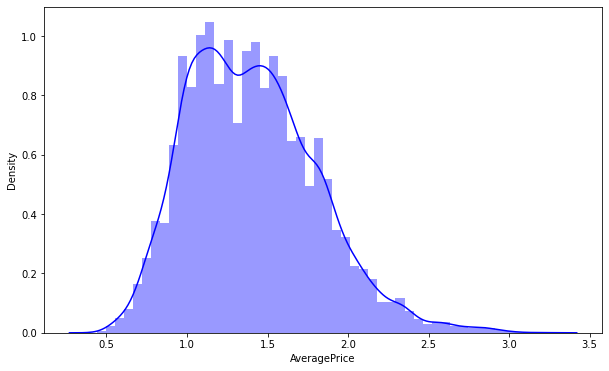

In [10]:
# plot distribution of the average price
plt.figure(figsize = (10,6))
sns.distplot(avocado_df.AveragePrice, color = 'b')

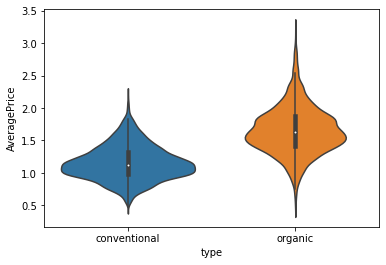

In [11]:
# Plot a violin plot of the average price vs avocado type
sns.violinplot(y = avocado_df.AveragePrice, x = avocado_df.type)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

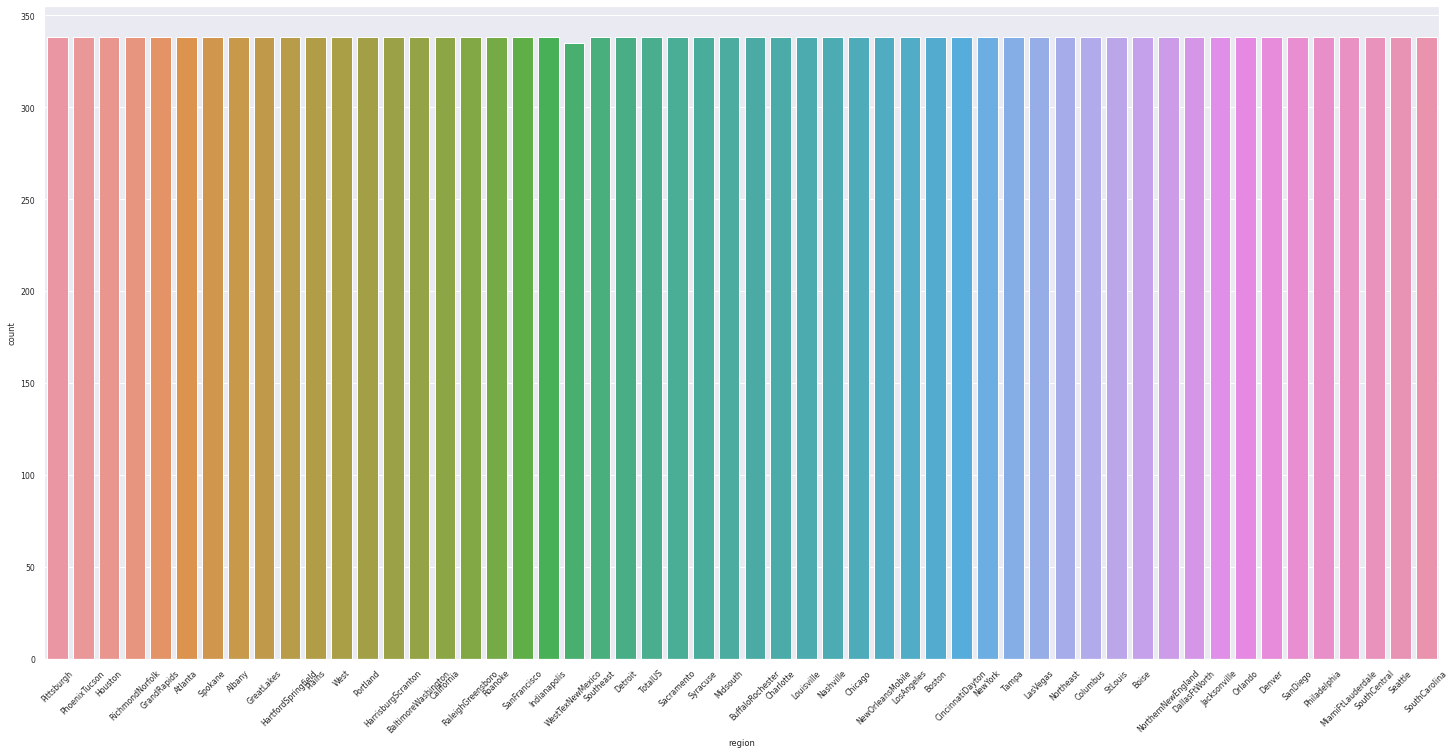

In [12]:
# Bar chart to indicate the number of regions

sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

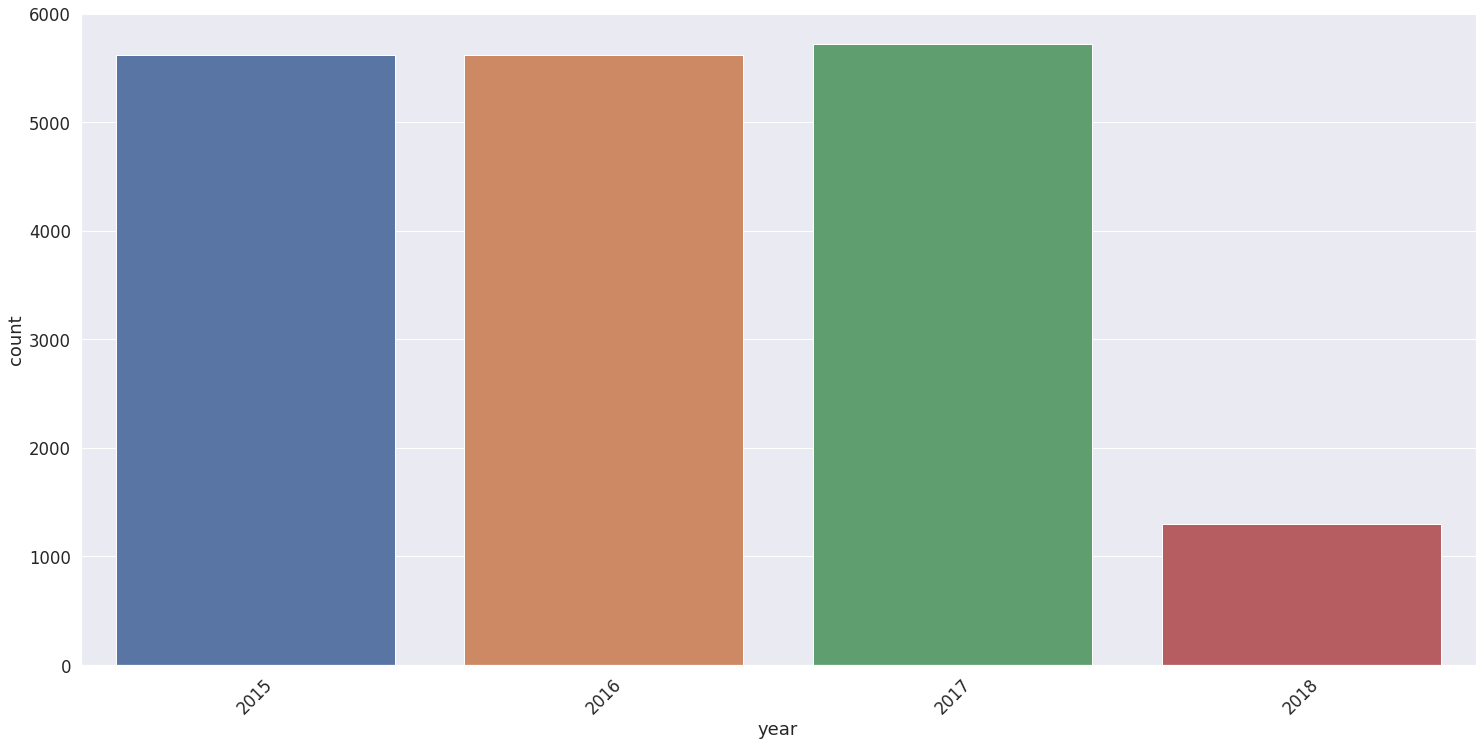

In [13]:
# Bar chart to indicate the count in every year
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


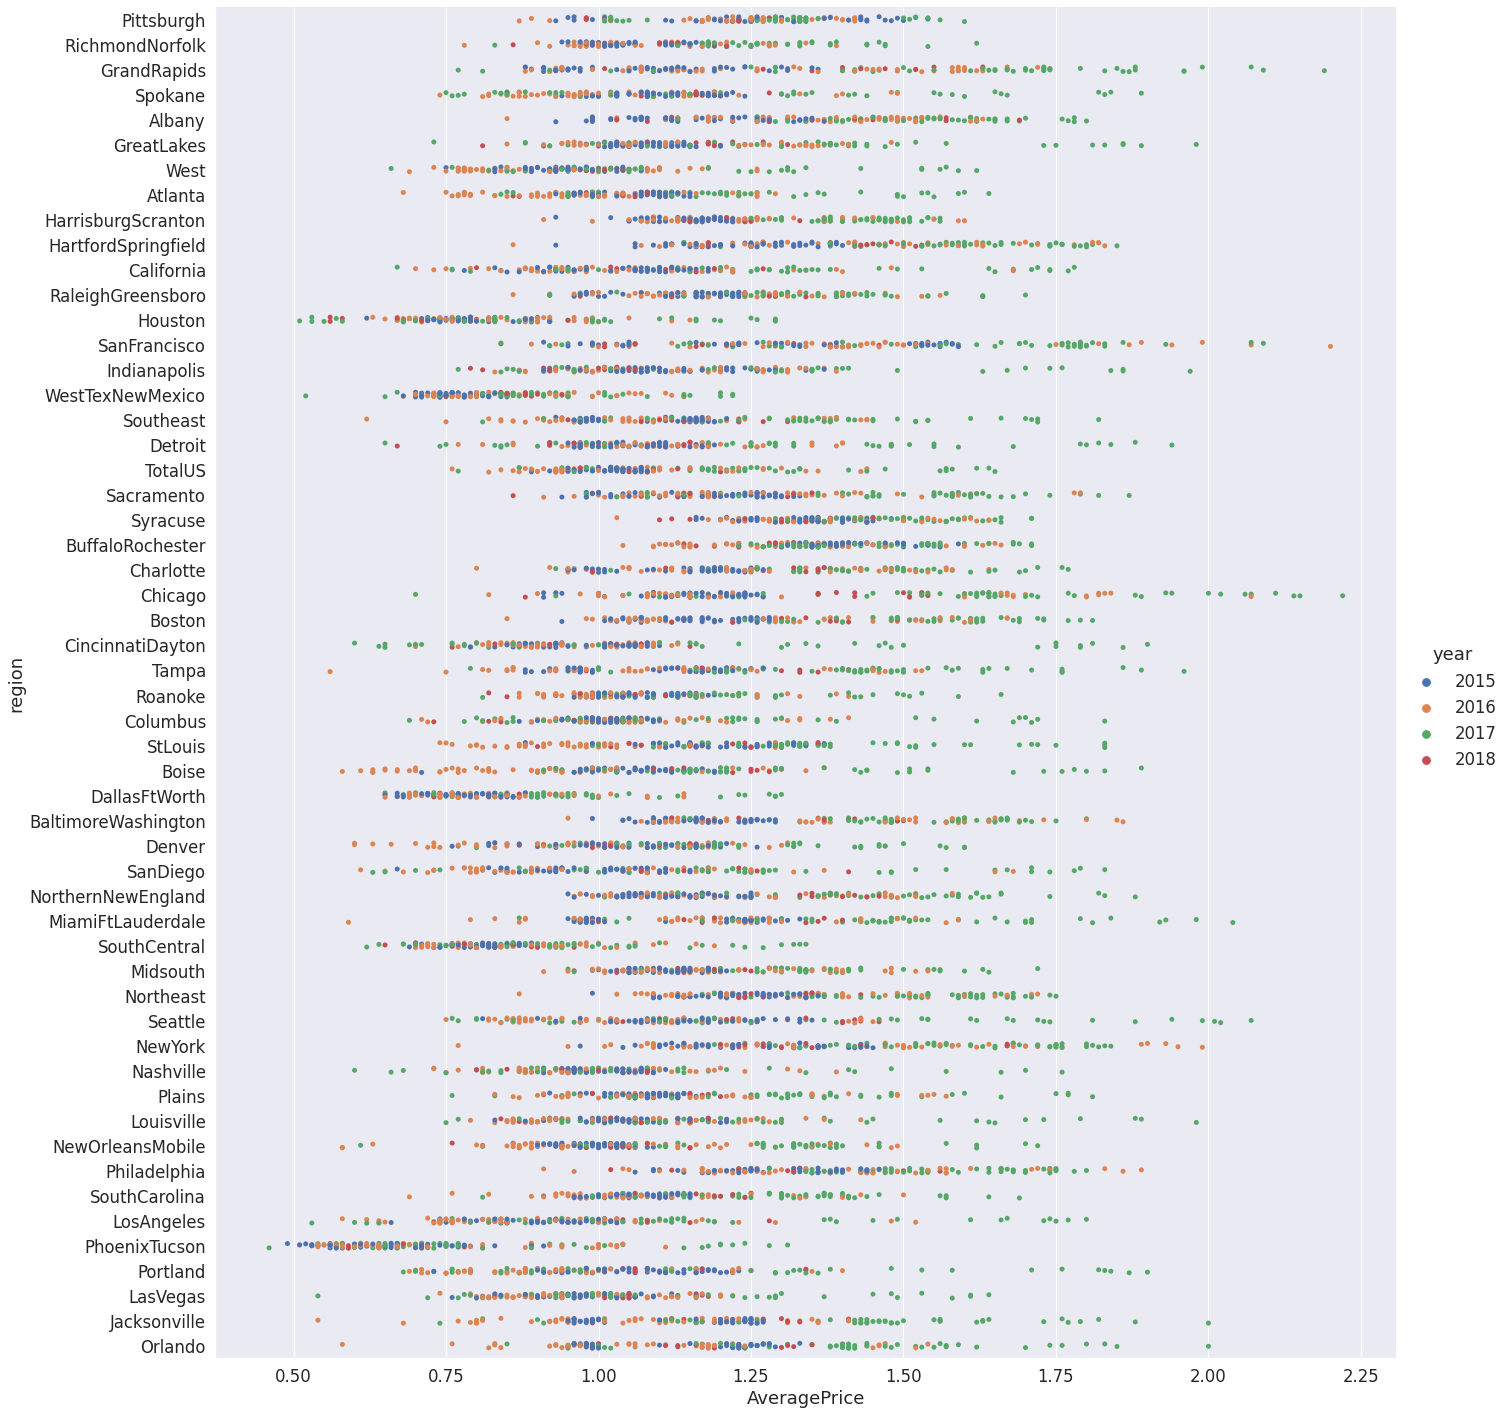

In [14]:
# Plot the avocado prices vs. regions fro conventional avocados
conventional = sns.catplot('AveragePrice','region', data = avocado_df[avocado_df['type']=='conventional'],hue = 'year',height = 20)

TASK #4 : PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL

In [15]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7470,52,01-01-2017,1.02,141043.91,58724.08,42203.79,2553.37,37562.67,28298.47,9264.20,0.00,conventional,2017,Pittsburgh
16542,52,01-01-2017,1.88,7740.98,2155.99,3030.64,1.20,2553.15,2547.83,5.32,0.00,organic,2017,PhoenixTucson
15747,52,01-01-2017,1.40,10109.46,7550.89,58.71,0.00,2499.86,2499.86,0.00,0.00,organic,2017,Houston
7682,52,01-01-2017,1.11,240752.75,82444.88,85577.58,5485.61,67244.68,65961.19,1104.32,179.17,conventional,2017,RichmondNorfolk
6410,52,01-01-2017,0.77,306129.40,1217.67,224774.25,7582.69,72554.79,68737.04,3714.24,103.51,conventional,2017,GrandRapids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,0,31-12-2017,1.03,578374.50,130774.36,396250.81,922.03,50427.30,46215.90,521.92,3689.48,conventional,2017,Sacramento
16278,0,31-12-2017,1.66,229313.64,11281.04,33549.86,122.83,184359.91,170878.67,13481.24,0.00,organic,2017,Northeast
6199,0,31-12-2017,0.90,1116393.20,481105.48,307423.18,4818.24,323046.30,161254.88,161616.45,174.97,conventional,2017,DallasFtWorth
7577,0,31-12-2017,0.92,419590.58,90432.19,134861.05,5994.91,188302.43,178330.99,9970.33,1.11,conventional,2017,RaleighGreensboro


In [17]:
data = avocado_df[['Date', 'AveragePrice']]
data

,Date,AveragePrice
7470,01-01-2017,1.02
16542,01-01-2017,1.88
15747,01-01-2017,1.40
7682,01-01-2017,1.11
6410,01-01-2017,0.77
...,...,...
7736,31-12-2017,1.03
16278,31-12-2017,1.66
6199,31-12-2017,0.90
7577,31-12-2017,0.92


In [18]:
data = data.rename(columns = {'Date' : 'ds','AveragePrice' : 'y'})

In [19]:
data

,ds,y
7470,01-01-2017,1.02
16542,01-01-2017,1.88
15747,01-01-2017,1.40
7682,01-01-2017,1.11
6410,01-01-2017,0.77
...,...,...
7736,31-12-2017,1.03
16278,31-12-2017,1.66
6199,31-12-2017,0.90
7577,31-12-2017,0.92


TASK #5 : DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [20]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,1.413861,0.800085,1.795157,1.413861,1.413861,-0.108319,-0.108319,-0.108319,-0.039127,-0.039127,-0.039127,-0.069192,-0.069192,-0.069192,0.0,0.0,0.0,1.305542
1,2015-01-03,1.413580,0.827324,1.804644,1.413580,1.413580,-0.107000,-0.107000,-0.107000,-0.041171,-0.041171,-0.041171,-0.065829,-0.065829,-0.065829,0.0,0.0,0.0,1.306580
2,2015-01-11,1.411331,0.862711,1.880439,1.411331,1.411331,-0.036710,-0.036710,-0.036710,0.014266,0.014266,0.014266,-0.050976,-0.050976,-0.050976,0.0,0.0,0.0,1.374621
3,2015-01-18,1.409363,0.877108,1.849431,1.409363,1.409363,-0.041247,-0.041247,-0.041247,0.014266,0.014266,0.014266,-0.055513,-0.055513,-0.055513,0.0,0.0,0.0,1.368116
4,2015-01-25,1.407395,0.881092,1.867679,1.407395,1.407395,-0.038939,-0.038939,-0.038939,0.014266,0.014266,0.014266,-0.053205,-0.053205,-0.053205,0.0,0.0,0.0,1.368457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-10-30,0.938384,0.560121,1.560526,0.865417,1.029252,0.097169,0.097169,0.097169,-0.031878,-0.031878,-0.031878,0.129047,0.129047,0.129047,0.0,0.0,0.0,1.035553
530,2019-10-31,0.937623,0.670353,1.676260,0.864183,1.028826,0.221321,0.221321,0.221321,0.094100,0.094100,0.094100,0.127221,0.127221,0.127221,0.0,0.0,0.0,1.158944
531,2019-11-01,0.936862,0.539942,1.552841,0.862949,1.028290,0.085073,0.085073,0.085073,-0.039127,-0.039127,-0.039127,0.124200,0.124200,0.124200,0.0,0.0,0.0,1.021934
532,2019-11-02,0.936100,0.545906,1.539533,0.861750,1.027926,0.078886,0.078886,0.078886,-0.041171,-0.041171,-0.041171,0.120057,0.120057,0.120057,0.0,0.0,0.0,1.014987


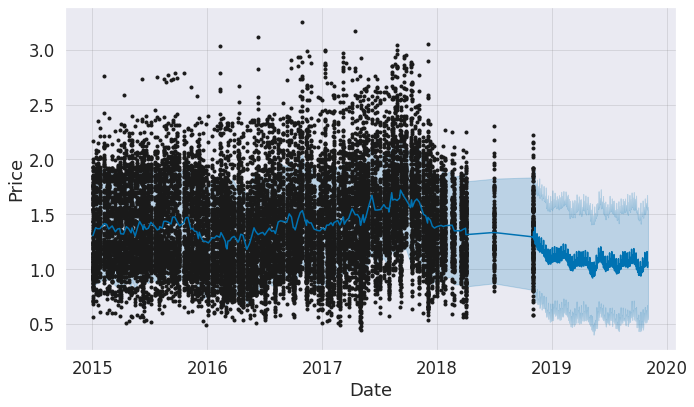

In [24]:
figure = m.plot(forecast,xlabel = 'Date',ylabel = 'Price')

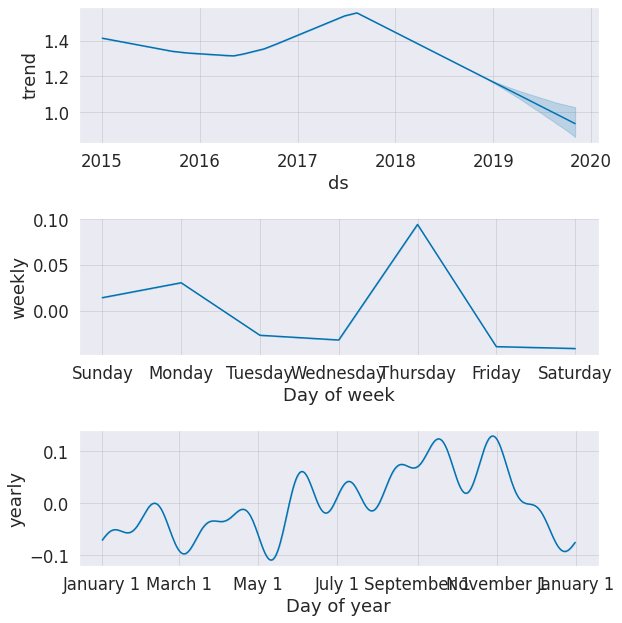

In [25]:
figure2 = m.plot_components(forecast)

TASK #6 : DEVELOP MODEL AND MAKE PREDICTIONS ( REGION SPECIFIC) - PART B

In [26]:
# dataframes creation for both training and testing datasets
avocado_df = pd.read_csv('avocado.csv')

West region

In [30]:
# Select specific region
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']

In [31]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

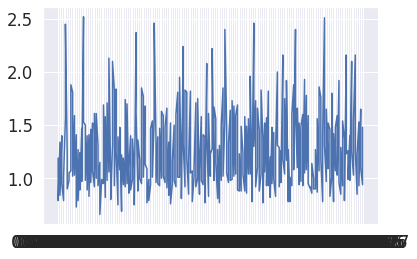

In [32]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [33]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})

In [34]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


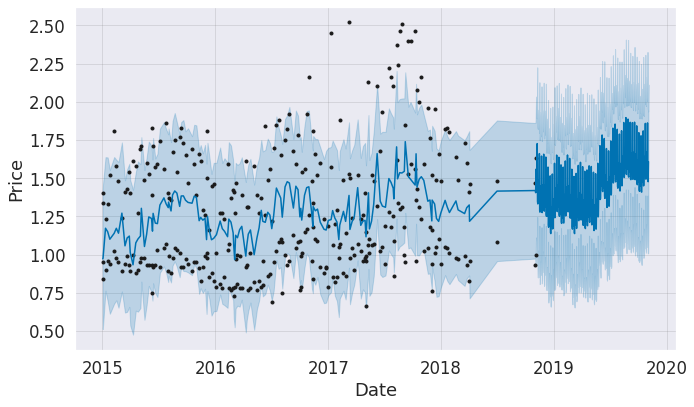

In [35]:
figure = m.plot(forecast, xlabel = 'Date' , ylabel = 'Price')

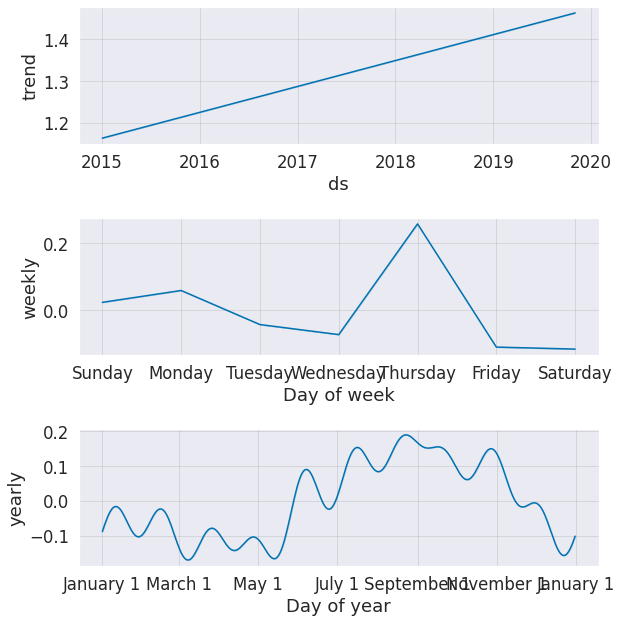

In [36]:
figure3 = m.plot_components(forecast)

Chicago region

In [37]:
data = pd.read_csv('avocado.csv')

In [38]:
data = data[data['region'] == 'Chicago']

In [39]:
data = data.sort_values('Date')

In [40]:
data = data[['Date','AveragePrice']]

In [41]:
data

,Date,AveragePrice
15217,01-01-2017,1.34
6092,01-01-2017,1.15
9589,01-02-2015,1.52
463,01-02-2015,0.91
9585,01-03-2015,1.82
...,...,...
446,31-05-2015,1.26
12370,31-07-2016,2.11
3245,31-07-2016,1.68
6040,31-12-2017,0.93


In [42]:
data = data.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})

In [43]:
data

,ds,y
15217,01-01-2017,1.34
6092,01-01-2017,1.15
9589,01-02-2015,1.52
463,01-02-2015,0.91
9585,01-03-2015,1.82
...,...,...
446,31-05-2015,1.26
12370,31-07-2016,2.11
3245,31-07-2016,1.68
6040,31-12-2017,0.93


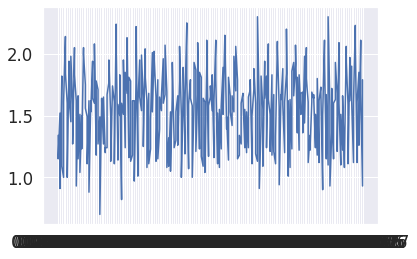

In [45]:
plt.plot(data['ds'],data['y'])

In [46]:
m = Prophet()
m.fit(data)
# Forecasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


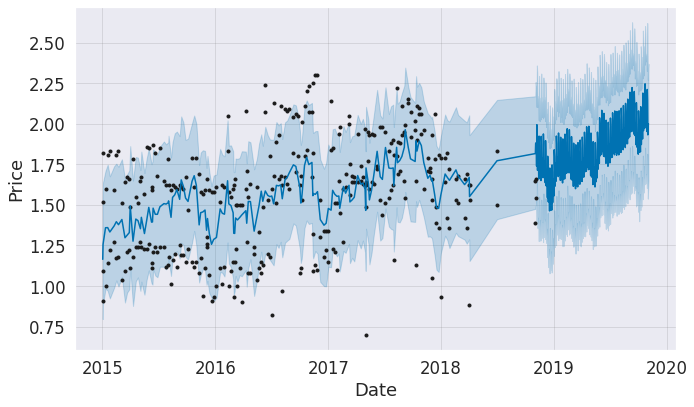

In [47]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

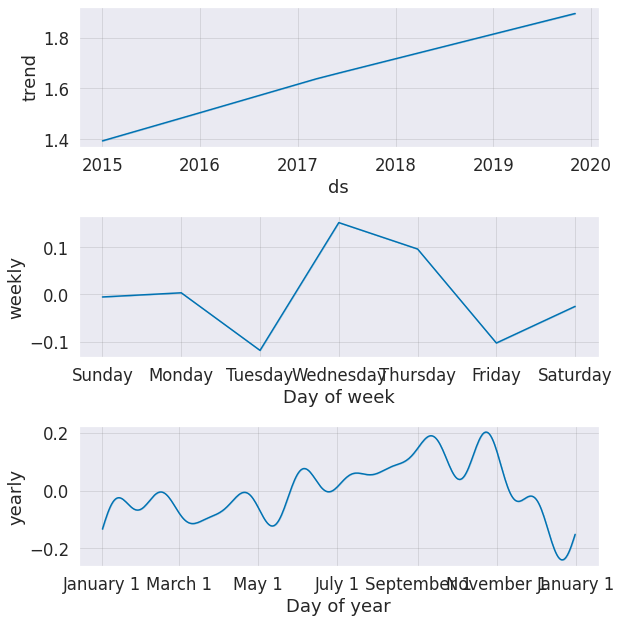

In [48]:
figure3 = m.plot_components(forecast)